# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sps  

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # просмотрел файл, увидел что в одну строку, нужен разделитель
pd.set_option('display.max_columns', None) # для отображения всех столбцов
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [4]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000':'ponds_around_3000'}, inplace=True) 
#посмотрели колонки, есть названия не по стилю, надо исправить         

In [5]:
data.describe().astype('int') #посмотрели колонки в числовом значении, чтобы оценить цифры для анализа

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23699,23699,23699,23699,14504,23613,21796,23699,21421,12180,18157,18180,18181,8079,18181,9110,20518
mean,9,6541548,60,2,2,10,34,5,10,1,28793,14191,0,490,0,517,180
std,5,10887013,35,1,1,6,22,4,5,1,12630,8608,0,342,0,277,219
min,0,12190,12,0,1,1,2,1,1,0,0,181,0,1,0,13,1
25%,6,3400000,40,1,2,5,18,2,7,0,18585,9238,0,288,0,294,45
50%,9,4650000,52,2,2,9,30,4,9,1,26726,13098,0,455,1,502,95
75%,14,6800000,69,3,2,16,42,8,12,2,37273,16293,1,612,1,729,232
max,50,763000000,900,19,100,60,409,33,112,5,84869,65968,3,3190,3,1344,1580


In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

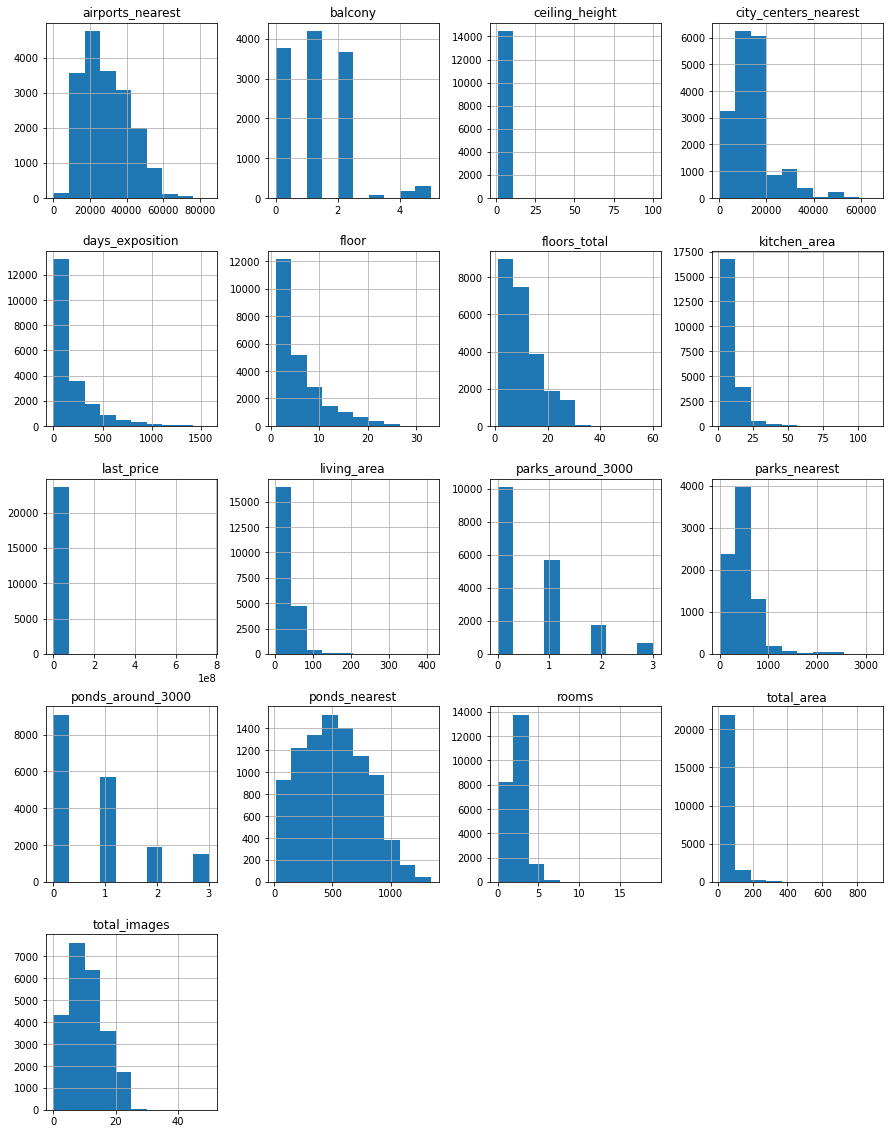

In [7]:
data = data.reindex(sorted(data.columns), axis=1) #отсортируем в алфавитном порядке для удобства работы со столбцами
data.hist(figsize=(15, 20));

**Вывод по блоку** 

В каждой строке таблицы содержатся данные объявления о продаже недвижимости. В таблице мы видим данные, которые сильно выбиваются из общей массы по значениям, необходимо эти данные отработать.
Также разобраться с пропущенными значениями

**шпаргалка по названиям столбцов**

airports_nearest — расстояние до ближайшего аэропорта 
balcony — число балконов;
ceiling_height — высота потолков (м);
city_centers_nearest — расстояние до центра города (м);
days_exposition — кол-во дней (от публикации до снятия объявления);
first_day_exposition — дата публикации;
floor — этаж;
floors_total — всего этажей в доме;
is_apartment — апартаменты (булево значение);
kitchen_area — площадь кухни (м²);
last_price — цена;
living_area — жилая площадь(м²);
locality_name — название населённого пункта;
open_plan — свободная планировка (булево значение);
parks_around_3000 — число парков в радиусе 3 км;
parks_nearest — расстояние до ближайшего парка (м);
ponds_around_3000 — число водоёмов в радиусе 3 км;
ponds_nearest — расстояние до ближайшего водоёма (м);
rooms — число комнат;
studio — квартира-студия (булево значение);
total_area — площадь квартиры (м²);
total_images — число фотографий квартиры в объявлении.

### Предобработка данных

Рассмотрим столбец rooms

In [8]:
data['rooms'].describe()  #рассмотрим столбец rooms , видим нулевые значения

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [9]:
data.query('rooms == 0')['rooms'].count() # посмотрим кол-во квартир с нулевым обозначением комнат

197

In [10]:
data.query('rooms == 0').head(10)

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images
144,NaN,2.0,NaN,NaN,181.0,2017-03-30T00:00:00,2,24.0,NaN,NaN,2450000.0,15.50,посёлок Мурино,False,NaN,NaN,NaN,NaN,0,True,27.00,1
349,NaN,0.0,NaN,NaN,45.0,2017-09-27T00:00:00,1,14.0,NaN,NaN,2320000.0,17.00,деревня Кудрово,True,NaN,NaN,NaN,NaN,0,False,25.00,4
440,38171.0,2.0,NaN,15015.0,64.0,2018-03-12T00:00:00,4,17.0,NaN,NaN,2480000.0,24.75,Санкт-Петербург,False,0.0,NaN,2.0,982.0,0,True,27.11,8
508,53115.0,1.0,NaN,19292.0,430.0,2017-03-28T00:00:00,19,26.0,NaN,NaN,3375000.0,24.30,посёлок Парголово,True,0.0,NaN,1.0,593.0,0,False,34.40,0
608,NaN,NaN,NaN,NaN,29.0,2019-02-20T00:00:00,7,10.0,NaN,NaN,1850000.0,NaN,посёлок Шушары,False,NaN,NaN,NaN,NaN,0,True,25.00,2
697,NaN,NaN,2.75,NaN,201.0,2017-12-01T00:00:00,21,25.0,NaN,NaN,2500000.0,17.50,деревня Кудрово,False,NaN,NaN,NaN,NaN,0,True,24.10,12
716,18654.0,0.0,2.70,29846.0,40.0,2017-06-07T00:00:00,1,9.0,NaN,NaN,1500000.0,12.00,посёлок Шушары,False,0.0,NaN,0.0,NaN,0,True,17.00,5
780,NaN,1.0,NaN,NaN,45.0,2018-02-20T00:00:00,8,18.0,NaN,NaN,2600000.0,NaN,посёлок Мурино,True,NaN,NaN,NaN,NaN,0,False,26.10,9
839,NaN,1.0,2.70,NaN,7.0,2017-04-14T00:00:00,3,5.0,False,NaN,1900000.0,15.00,поселок Новый Свет,True,NaN,NaN,NaN,NaN,0,False,35.00,14
946,NaN,2.0,NaN,NaN,483.0,2016-09-27T00:00:00,7,27.0,NaN,NaN,2200000.0,18.00,посёлок Мурино,True,NaN,NaN,NaN,NaN,0,False,23.00,5


In [11]:
data.query('rooms == 0')['living_area'].describe() # сверим с площадью, минимум 2 квадратных метра - это явная аномалия, но нулевых значений нет. Заменим значения rooms = 0 на 1 для всех объявлений, где есть жилая площадь

count    183.000000
mean      18.865246
std        6.549527
min        2.000000
25%       16.000000
50%       18.000000
75%       19.950000
max       68.000000
Name: living_area, dtype: float64

In [12]:
data.loc[(data['rooms'] == 0), 'rooms'] = 1  # присваиваем единицу всем значениям столбца 'rooms'

In [13]:
data['rooms'].isna().sum() # проверяем пропущенные значения, все ок

0

In [14]:
data.query('rooms == 0')['rooms'].count() # проверяем еще раз нулевые, все ок

0

Исходя из общей площади недвижимости и отсутствием кухни, предполагаем, что это квартиры-студии и ошибок в таблице нет

Делаем корректировку по дате

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') #сделаем дату корретной
data.head(5)

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images
0,18863.0,NaN,2.70,16028.0,NaN,2019-03-07,8,16.0,NaN,25.0,13000000.0,51.0,Санкт-Петербург,False,1.0,482.0,2.0,755.0,3,False,108.0,20
1,12817.0,2.0,NaN,18603.0,81.0,2018-12-04,1,11.0,NaN,11.0,3350000.0,18.6,посёлок Шушары,False,0.0,NaN,0.0,NaN,1,False,40.4,7
2,21741.0,0.0,NaN,13933.0,558.0,2015-08-20,4,5.0,NaN,8.3,5196000.0,34.3,Санкт-Петербург,False,1.0,90.0,2.0,574.0,2,False,56.0,10
3,28098.0,0.0,NaN,6800.0,424.0,2015-07-24,9,14.0,NaN,NaN,64900000.0,NaN,Санкт-Петербург,False,2.0,84.0,3.0,234.0,3,False,159.0,0
4,31856.0,NaN,3.03,8098.0,121.0,2018-06-19,13,14.0,NaN,41.0,10000000.0,32.0,Санкт-Петербург,False,2.0,112.0,1.0,48.0,2,False,100.0,2


Анализируем столбец сeiling_height

In [16]:
data['ceiling_height'].describe()  #рассмотрим столбец ceiling_height , видим аномальное значения

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

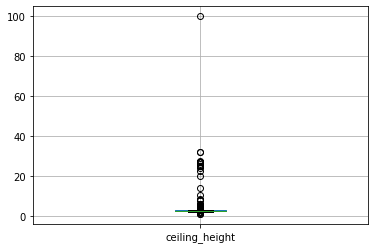

In [17]:
data.boxplot(column='ceiling_height') # диаграмма размаха по столбцу ceiling_height
plt.show  # видим выброс 100-метровых потолков, а также группа значений в 20-30 метров 

In [18]:
data.query('ceiling_height < 2.5 or ceiling_height >= 6')['ceiling_height'].count()
# подсчет количества значений ceiling_height при высоте потолка меньше 2.5 метра или больше 6(вдруг коммуналка).

103

In [19]:
# меняем значения в столбце ceiling_height не менее 6 на те же, деленные на 10
data.loc[data['ceiling_height'] >= 6, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 6, 'ceiling_height'] / 10

<function matplotlib.pyplot.show(close=None, block=None)>

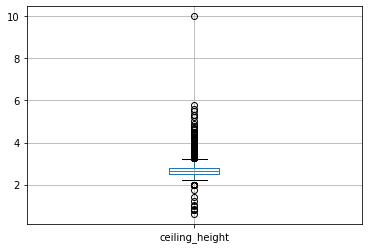

In [20]:
data.boxplot(column='ceiling_height') # диаграмма размаха по столбцу ceiling_height
plt.show

In [21]:
data.query('ceiling_height >= 6')

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images
22869,34963.0,5.0,10.0,8283.0,19.0,2018-07-25,5,5.0,True,11.0,15000000.0,14.0,Санкт-Петербург,False,1.0,223.0,3.0,30.0,1,False,25.0,0


рассмотим объект, видим аномальное значение, удалим его
По построенной диаграмме размаха видно, что есть еще отрывы в группе от 3.5 до 6 метров. Такое в Спб возможно. Уберем значения меньше 2.5 и выше 6

In [22]:
data.query('ceiling_height > 2.5 and ceiling_height < 6')['ceiling_height'].mean()

2.802112314186089

In [23]:
data.loc[data['ceiling_height'] < 2.5, 'ceiling_height'] = 2.8
data.loc[data['ceiling_height'] > 6, 'ceiling_height'] = 2.8

In [24]:
data.query('ceiling_height < 2.5 and ceiling_height > 6')['ceiling_height'].sum()

0.0

In [25]:
data['ceiling_height'].isna().sum() #добавлено

9195

In [26]:
data['ceiling_height'].describe() #добавлено

count    14504.000000
mean         2.728738
std          0.275764
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.800000
Name: ceiling_height, dtype: float64

In [27]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.72)

Пропусков достаточно много. Поэтому я решил его заменить средним значением, можно попробовать медианным. Заменить на 0 не можем, это  испортит статистику.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   airports_nearest      18157 non-null  float64       
 1   balcony               12180 non-null  float64       
 2   ceiling_height        23699 non-null  float64       
 3   city_centers_nearest  18180 non-null  float64       
 4   days_exposition       20518 non-null  float64       
 5   first_day_exposition  23699 non-null  datetime64[ns]
 6   floor                 23699 non-null  int64         
 7   floors_total          23613 non-null  float64       
 8   is_apartment          2775 non-null   object        
 9   kitchen_area          21421 non-null  float64       
 10  last_price            23699 non-null  float64       
 11  living_area           21796 non-null  float64       
 12  locality_name         23650 non-null  object        
 13  open_plan       

Рассмотрим столбец floors_total

In [29]:
data.loc[data['floors_total'].isna()].head(10)  #Выполним проверку столбца "floors_total" на отсутствующие значения

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images
186,39197.0,NaN,2.72,12373.0,49.0,2018-10-02,4,NaN,NaN,12.00,11640000.0,30.80,Санкт-Петербург,False,1.0,123.0,0.0,NaN,2,False,65.20,12
237,22041.0,0.0,2.72,17369.0,251.0,2016-11-23,1,NaN,NaN,NaN,2438033.0,20.75,Санкт-Петербург,False,0.0,NaN,1.0,374.0,1,False,28.10,4
457,37364.0,0.0,2.72,8322.0,727.0,2015-08-01,12,NaN,NaN,10.63,9788348.0,38.40,Санкт-Петербург,False,2.0,309.0,2.0,706.0,2,False,70.80,4
671,22041.0,0.0,2.72,17369.0,123.0,2017-04-06,8,NaN,NaN,16.80,6051191.0,47.10,Санкт-Петербург,False,0.0,NaN,1.0,374.0,3,False,93.60,4
1757,22735.0,0.0,2.72,11618.0,77.0,2017-04-22,9,NaN,NaN,NaN,3600000.0,NaN,Санкт-Петербург,False,1.0,835.0,1.0,652.0,1,False,39.00,5
1930,39886.0,0.0,2.72,10660.0,90.0,2016-05-13,4,NaN,NaN,NaN,9750000.0,NaN,Санкт-Петербург,False,1.0,2276.0,3.0,244.0,2,False,66.77,1
2392,43074.0,0.0,2.72,10820.0,48.0,2017-06-29,22,NaN,NaN,9.00,5395770.0,29.00,Санкт-Петербург,False,0.0,NaN,0.0,NaN,2,False,53.00,7
2846,22041.0,0.0,2.72,17369.0,307.0,2016-09-21,15,NaN,NaN,NaN,2325000.0,19.40,Санкт-Петербург,False,0.0,NaN,1.0,374.0,1,False,27.80,4
2952,23606.0,NaN,2.72,3148.0,NaN,2019-04-23,6,NaN,NaN,12.30,6500000.0,22.20,Санкт-Петербург,False,0.0,NaN,0.0,NaN,1,False,54.30,10
3031,NaN,NaN,2.72,NaN,231.0,2018-03-27,12,NaN,NaN,12.00,6400000.0,32.00,Кудрово,False,NaN,NaN,NaN,NaN,2,False,56.70,9


In [30]:
data['floors_total'].isna().sum() # cреди этажей, есть 4,15,12,8. Скорее всего, пропуски носят случайный характер.

86

In [31]:
data['floors_total'].unique()  

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [32]:
data['floors_total'].fillna(data['floor'], inplace=True) # заполняем пропуски в floors_total значениями floor.

Рассмотрим столбец living_area

In [33]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [34]:
data.query('living_area < 6')

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images
3242,19272.0,NaN,2.72,13073.0,216.0,2017-07-02,17,17.0,NaN,11.0,4440000.0,3.0,Санкт-Петербург,False,0.0,NaN,0.0,NaN,1,False,41.0,7
13915,32453.0,NaN,3.00,6521.0,91.0,2018-02-06,2,6.0,NaN,9.0,6350000.0,2.0,Санкт-Петербург,False,0.0,NaN,1.0,1012.0,2,False,52.0,20
17582,22735.0,2.0,2.72,11618.0,70.0,2018-08-11,8,25.0,NaN,NaN,2680000.0,5.0,Санкт-Петербург,False,1.0,835.0,1.0,652.0,1,True,22.0,11
21758,NaN,NaN,2.72,NaN,66.0,2018-01-01,22,24.0,NaN,NaN,2330000.0,2.0,посёлок Мурино,False,NaN,NaN,NaN,NaN,1,True,23.0,0
21943,29338.0,NaN,2.50,11270.0,33.0,2019-02-28,1,9.0,NaN,9.8,6100000.0,5.4,Санкт-Петербург,False,1.0,584.0,0.0,NaN,4,False,77.6,15
23574,33255.0,1.0,3.00,5975.0,280.0,2015-11-24,8,8.0,NaN,16.0,64990000.0,3.0,Санкт-Петербург,False,1.0,630.0,3.0,100.0,3,False,139.0,14


In [35]:
data.loc[data['living_area'] <= 6, 'living_area'] = data.loc[data['total_area'] - data['living_area'] <= 6, 'total_area'] - 6

In [36]:
data['living_area'].describe() #попробуем приминить логику и от общей площади вычтем площадь кухни, чтобы узнать жилую площадь

count    21789.000000
mean        34.467711
std         22.027098
min          6.500000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [37]:
data['living_area'].isna().sum()

1910

In [38]:
data['living_area'] = data['living_area'].fillna(-1) #значение пропусков в столбце living_area посчитаем с помощью медианы, предварительно заменив NaN значения на нетипичные и сгруппировав по общей площади квартиры.

In [39]:
def count_living_area(row):
    living_area = row['living_area']
    total_area = row['total_area']
    if living_area == -1:      
        return total_area_to_median[total_area]
    return living_area
 
total_area_to_median = data.groupby('total_area').median()['living_area'].to_dict()    
       
data['living_area'] = data.apply(count_living_area, axis=1)

In [40]:
len(data.query('living_area == -1')) # функция сработала не во всех случаях, несколько ячеек в living_area всё ещё равны -1, для них не нашлось медианы.значения выбиваются из общих данных, уберем и их.

149

In [41]:
data = data[data['living_area'] != -1]

In [42]:
len(data.query('living_area == -1'))

0

Рассмотрим столбец kitchen_area. По снипу площадь кухни меньше 5 м быть не может

In [43]:
data['kitchen_area'].isna().sum() # считаем количество пропущенных значений kitchen_area

2222

In [44]:
data['kitchen_area'].describe()

count    21328.000000
mean        10.548661
std          5.874988
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [45]:
data['kitchen_area'] = data['kitchen_area'].fillna(0) # заполним пропуски нулевыми значениями , так как отсутствие данных о площади кухни связано с квартирами, т.е студиями

In [46]:
k_area = data.query('kitchen_area > 5' and 'kitchen_area < 15')['kitchen_area'].mean() # вычислим среднее значение для кухни отсортировав не нужные

In [47]:
data.loc[data['kitchen_area'] < 5, 'kitchen_area'] = k_area # меньше 5 нельзя по снипу

In [48]:
data['kitchen_area'].describe()

count    23550.000000
mean        10.323169
std          5.627595
min          5.000000
25%          7.400000
50%          9.000000
75%         11.400000
max        112.000000
Name: kitchen_area, dtype: float64

Некорректные данные по площади кухни устранены. К сожалению,пропущенных значений в столбце много, но удалять строки или делать привязку к другими данным не можем, это  вредно для статистики и можно сделать неправильный вывод, оставим строки с неизвестными площадями как есть.

Рассмотрим столбец  balcony

In [49]:
data['balcony'].isna().sum()

11439

In [50]:
data['balcony'].describe()

count    12111.000000
mean         1.147634
std          1.068969
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [51]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [52]:
data.query('balcony.isna()').head(10)

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images
0,18863.0,NaN,2.70,16028.0,NaN,2019-03-07,8,16.0,NaN,25.000000,13000000.0,51.00,Санкт-Петербург,False,1.0,482.0,2.0,755.0,3,False,108.00,20
4,31856.0,NaN,3.03,8098.0,121.0,2018-06-19,13,14.0,NaN,41.000000,10000000.0,32.00,Санкт-Петербург,False,2.0,112.0,1.0,48.0,2,False,100.00,2
5,NaN,NaN,2.72,NaN,55.0,2018-09-10,5,12.0,NaN,9.100000,2890000.0,14.40,городской посёлок Янино-1,False,NaN,NaN,NaN,NaN,1,False,30.40,10
8,NaN,NaN,2.72,NaN,189.0,2018-05-23,26,27.0,NaN,8.810000,2900000.0,15.43,посёлок Мурино,False,NaN,NaN,NaN,NaN,1,False,33.16,20
10,38357.0,NaN,2.67,13878.0,137.0,2017-11-16,3,12.0,NaN,8.500000,5050000.0,20.30,Санкт-Петербург,False,1.0,310.0,2.0,553.0,1,False,39.60,5
16,22108.0,NaN,3.05,10698.0,397.0,2017-11-23,1,5.0,NaN,9.000000,6700000.0,55.60,Санкт-Петербург,False,3.0,420.0,0.0,NaN,3,False,82.00,11
19,38900.0,NaN,2.75,12843.0,97.0,2019-01-09,8,16.0,NaN,12.000000,14200000.0,76.00,Санкт-Петербург,False,0.0,NaN,0.0,NaN,3,False,121.00,16
23,15414.0,NaN,2.60,14211.0,615.0,2016-10-29,9,9.0,NaN,6.100000,2950000.0,17.70,Санкт-Петербург,False,2.0,517.0,1.0,190.0,1,False,32.00,11
26,11580.0,NaN,2.72,10510.0,265.0,2017-04-28,4,5.0,NaN,7.000000,4050000.0,43.00,Санкт-Петербург,False,0.0,NaN,1.0,95.0,4,False,60.00,6
30,NaN,NaN,2.72,NaN,63.0,2018-02-19,2,9.0,NaN,7.970933,2200000.0,16.90,Коммунар,False,NaN,NaN,NaN,NaN,1,False,32.80,12


In [53]:
data['balcony']=data['balcony'].fillna(0).astype('int')

In [54]:
data['balcony'].isna().sum()

0

Не заполнены значения у недвижимости, которая не является апартаментами, без свободной планировки. 
Других общих критерий не видно. По распределению данных, логично было бы предположить, что данные которые имеют пропуск - это означает отсутствие балкона, таким образом можем указать 0 вместо NaN.
Хотя это может быть неверная гипотеза. Как видно есть разная этажность, а балконов быть не может либо на 1 этаже либо в коммуналках.
Значит принимает решение просто заполнить поле, чтобы не было пропусков.


Рассмотрим столбец locality_name

In [55]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [56]:
data['locality_name'] = data['locality_name'].str.lower() #gриведём значения к нижнему регистру для избавления от дубликатов

In [57]:
data['locality_name'] = data['locality_name'].str.replace('ё','е') # сделано

In [58]:
 data['locality_name'].unique().shape[0]

331

In [59]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')

In [60]:
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары',
       'поселок городского типа янино-1', 'поселок парголово',
       'поселок мурино', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'посел

In [61]:
data['locality_name'].isna().sum()

49

Видим кол-во пропущенных значений. Чем-то конкретным мы их заменить не можем, если удалить, это может повлиять на результат.
Оставим пока как есть

Рассмотрим значения в столбце airports_nearest

In [62]:
data['airports_nearest'].isna().sum() # подсчитаем пустые значения

5499

In [63]:
data['airports_nearest'].describe()

count    18051.000000
mean     28779.911972
std      12639.490905
min          0.000000
25%      18569.000000
50%      26709.000000
75%      37244.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Text(0.5, 1.0, 'Расстояния до аэропортов')

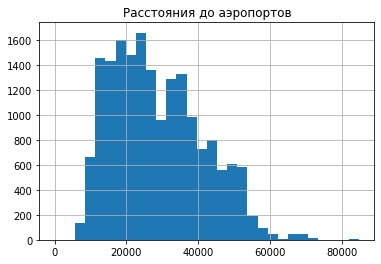

In [64]:
data.hist('airports_nearest', bins=30) # построим гистограмму распределения
plt.title('Расстояния до аэропортов') 

In [65]:
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = None  # уберем нулевые значения

In [66]:
data.query('~airports_nearest.isna()')['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'поселок парголово',
       'ломоносов', 'петергоф', 'пушкин', 'колпино', 'кронштадт',
       'поселок металлострой', 'павловск', 'сестрорецк', 'красное село',
       'поселок понтонный', 'зеленогорск', 'поселок молодежное',
       'поселок стрельна', 'поселок александровская', nan,
       'поселок песочный', 'поселок петро-славянка', 'поселок репино',
       'поселок саперный', 'поселок щеглово', 'поселок лисий нос',
       'поселок левашово', 'поселок белоостров', 'поселок мурино',
       'поселок усть-ижора'], dtype=object)

Так как пропусков достаточно много, мы сделали попытку посмотреть к чему они относятся. Заменить такие значения также не предоставляется возможны. Скорей всего, это далекие зоны от аэропорта для которых это значение не сыграет особой роли.

Рассмотрим значения в столбцах parks_around_3000, parks_nearest, ponds_around_3000 и ponds_nearest.

In [67]:
data[['parks_nearest', 'ponds_nearest', 'parks_around_3000', 'ponds_around_3000']].isna().sum() # сумма незаполненных значений исследуемых столбцов

parks_nearest        15522
ponds_nearest        14508
parks_around_3000     5475
ponds_around_3000     5475
dtype: int64

In [68]:
data[['parks_nearest', 'ponds_nearest', 'parks_around_3000', 'ponds_around_3000']].describe() 

,parks_nearest,ponds_nearest,parks_around_3000,ponds_around_3000
count,8028.000000,9042.000000,18075.000000,18075.000000
mean,490.146861,518.736894,0.610844,0.767746
std,340.416711,277.592474,0.801634,0.936545
min,1.000000,13.000000,0.000000,0.000000
25%,287.750000,295.000000,0.000000,0.000000
50%,455.000000,503.000000,0.000000,1.000000
75%,612.000000,730.000000,1.000000,1.000000
max,3190.000000,1344.000000,3.000000,3.000000


In [69]:
data['ponds_around_3000'].fillna(data['ponds_around_3000'].mean(), inplace=True) # заполним пустые значения медианным значением, так как видим, что среднее значение в обоих параметрах околок единицы
data['parks_around_3000'].fillna(data['parks_around_3000'].mean(), inplace=True)

Рассмотрим значения в столбце days_exposition


In [70]:
data['days_exposition'].describe() 

count    20388.000000
mean       181.124681
std        219.739211
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [71]:
data['days_exposition'].isna().sum()

3162

In [72]:
data['days_exposition'].unique()

array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

Text(0.5, 1.0, 'Длительность размещения объявлений')

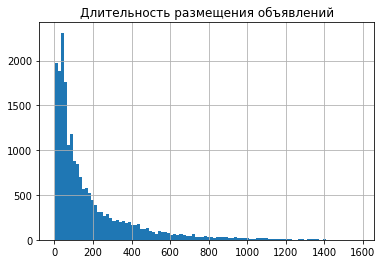

In [73]:
data.hist('days_exposition', bins=100) # строим гистограмму распределения days_exposition
plt.title('Длительность размещения объявлений') 

Text(0.5, 1.0, 'Длительность размещения объявлений')

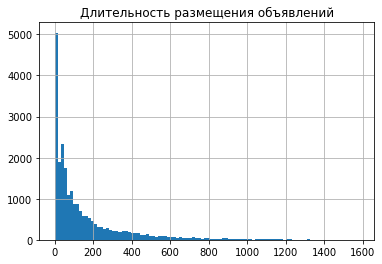

In [74]:
data['days_exposition'].fillna(0, inplace=True) 
data.hist('days_exposition', bins=100) 
plt.title('Длительность размещения объявлений') 

Распределение имеет ярко выраженный пик на нуле, что может свидетельствовать о наличии неожиданной закономерности в отсутствующих данных. Однако, других значений в столбце равных нулю не было замечено. Исходя из этого, мы можем считать, что пропущенные значения в этом столбце означают отсутствие дней на рынке. Возможно, объявление было случайно выложено или имело другие параметры.

Рассмотрим значения в столбце is_apartment

In [75]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [76]:
data.loc[data['is_apartment'].isna()]

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images
0,18863.0,0,2.70,16028.0,0.0,2019-03-07,8,16.0,NaN,25.000000,13000000.0,51.0,санкт-петербург,False,1.000000,482.0,2.000000,755.0,3,False,108.00,20
1,12817.0,2,2.72,18603.0,81.0,2018-12-04,1,11.0,NaN,11.000000,3350000.0,18.6,поселок шушары,False,0.000000,NaN,0.000000,NaN,1,False,40.40,7
2,21741.0,0,2.72,13933.0,558.0,2015-08-20,4,5.0,NaN,8.300000,5196000.0,34.3,санкт-петербург,False,1.000000,90.0,2.000000,574.0,2,False,56.00,10
3,28098.0,0,2.72,6800.0,424.0,2015-07-24,9,14.0,NaN,7.970933,64900000.0,74.5,санкт-петербург,False,2.000000,84.0,3.000000,234.0,3,False,159.00,0
4,31856.0,0,3.03,8098.0,121.0,2018-06-19,13,14.0,NaN,41.000000,10000000.0,32.0,санкт-петербург,False,2.000000,112.0,1.000000,48.0,2,False,100.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,45602.0,0,2.60,34104.0,239.0,2016-08-05,8,9.0,NaN,8.000000,4600000.0,40.0,петергоф,False,1.000000,352.0,1.000000,675.0,3,False,62.40,9
23694,24665.0,0,3.70,4232.0,0.0,2017-03-21,3,5.0,NaN,13.830000,9700000.0,73.3,санкт-петербург,False,1.000000,796.0,3.000000,381.0,3,False,133.81,9
23695,NaN,0,2.72,NaN,45.0,2018-01-15,4,5.0,NaN,8.500000,3100000.0,38.0,тосно,False,0.610844,NaN,0.767746,NaN,3,False,59.00,14
23696,NaN,0,2.72,NaN,0.0,2018-02-11,1,3.0,NaN,7.970933,2500000.0,29.7,село рождествено,False,0.610844,NaN,0.767746,NaN,2,False,56.70,18


In [77]:
data.query('is_apartment != True or is_apartment != False')['is_apartment'].count()

2767

In [78]:
data['is_apartment'] = data['is_apartment'].fillna(False)  #допустим, что пропущенные значения означают,что аппартаменты не входят в предложение по продаже кваритр - выполним замену неизвестных данных на значение False

In [79]:
data['is_apartment'].unique()

array([False,  True])

Рассмотрим значения в столбце last_price

In [80]:
 data['last_price'] = data['last_price'].astype('int')

In [81]:
data['last_price'].describe()

count    2.355000e+04
mean     6.478414e+06
std      1.061473e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.642000e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Text(0.5, 1.0, 'Распределение цены')

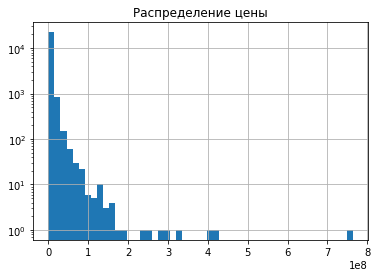

In [82]:
data.hist('last_price', bins=50,grid=True, log=True)
plt.title('Распределение цены')

<AxesSubplot:>

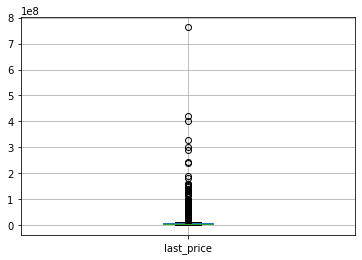

In [83]:
data.boxplot(column='last_price') # на обоих графиках видим большое скопление данных около нуля, а также хвост из выбросa. 

In [84]:
data['last_price'].min()

12190

In [85]:
data.query('last_price < 1000000')['last_price'].count() #кол-во квартир меньше миллиона, оставляем

225

In [86]:
data['last_price'].max()


763000000

Аномальных и пропущенных значений мы не видим. 

Рассмотрим значения в столбце total_area

In [87]:
data['total_area'].describe()

count    23550.000000
mean        60.069135
std         34.464373
min         12.000000
25%         40.000000
50%         52.000000
75%         69.677500
max        900.000000
Name: total_area, dtype: float64

In [88]:
data.query('total_area < 13')['total_area'].count()

1

In [89]:
data.query('total_area > 500')['total_area'].count()

6

In [90]:
data.drop(index=data.query('total_area < 13' and 'total_area > 500').index,inplace=True) # уберем значения меньше 13 и больше 500

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23544 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   airports_nearest      18045 non-null  float64       
 1   balcony               23544 non-null  int64         
 2   ceiling_height        23544 non-null  float64       
 3   city_centers_nearest  18068 non-null  float64       
 4   days_exposition       23544 non-null  float64       
 5   first_day_exposition  23544 non-null  datetime64[ns]
 6   floor                 23544 non-null  int64         
 7   floors_total          23544 non-null  float64       
 8   is_apartment          23544 non-null  bool          
 9   kitchen_area          23544 non-null  float64       
 10  last_price            23544 non-null  int64         
 11  living_area           23544 non-null  float64       
 12  locality_name         23495 non-null  object        
 13  open_plan       

**Вывод** 
Мы заполнили пропущенные значения в большинстве столбцов, где это было необходимо, используя различные методы.Также выявили возможные причины их появления и преобразовали данные в нужные типы при работе с пропущенными значениями, проанализировали распределения значений всех столбцов, где были пропуски, что будет полезно в дальнейшем исследовании

### Посчитайте и добавьте в таблицу новые столбцы

Считаем и добавим в таблицу цену квадратного метра

In [92]:
data['price_metr'] = data['last_price']/data['total_area']

In [93]:
data['price_metr'] = data['price_metr'].astype('int')

In [94]:
data['price_metr'].mean().round(1) # среднее значение 98,5 тыс за квадратный метр

99219.5

In [95]:
data.head(5)

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images,price_metr
0,18863.0,0,2.70,16028.0,0.0,2019-03-07,8,16.0,False,25.000000,13000000,51.0,санкт-петербург,False,1.0,482.0,2.0,755.0,3,False,108.0,20,120370
1,12817.0,2,2.72,18603.0,81.0,2018-12-04,1,11.0,False,11.000000,3350000,18.6,поселок шушары,False,0.0,NaN,0.0,NaN,1,False,40.4,7,82920
2,21741.0,0,2.72,13933.0,558.0,2015-08-20,4,5.0,False,8.300000,5196000,34.3,санкт-петербург,False,1.0,90.0,2.0,574.0,2,False,56.0,10,92785
3,28098.0,0,2.72,6800.0,424.0,2015-07-24,9,14.0,False,7.970933,64900000,74.5,санкт-петербург,False,2.0,84.0,3.0,234.0,3,False,159.0,0,408176
4,31856.0,0,3.03,8098.0,121.0,2018-06-19,13,14.0,False,41.000000,10000000,32.0,санкт-петербург,False,2.0,112.0,1.0,48.0,2,False,100.0,2,100000


Посчитаем и добавим в таблицу день недели, месяц, год

In [96]:
# создаем спискок дней недели с учетом datetime (0 - Понедельник, 1 - Вторник,...)
week  = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'] 
data['day_week_exposition']= data['first_day_exposition'].dt.weekday.apply(lambda x: week[x])

In [97]:
data['month_exposition']=data['first_day_exposition'].dt.month

In [98]:
data['year_exposition']=data['first_day_exposition'].dt.year

In [99]:
data.head(5)

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images,price_metr,day_week_exposition,month_exposition,year_exposition
0,18863.0,0,2.70,16028.0,0.0,2019-03-07,8,16.0,False,25.000000,13000000,51.0,санкт-петербург,False,1.0,482.0,2.0,755.0,3,False,108.0,20,120370,Четверг,3,2019
1,12817.0,2,2.72,18603.0,81.0,2018-12-04,1,11.0,False,11.000000,3350000,18.6,поселок шушары,False,0.0,NaN,0.0,NaN,1,False,40.4,7,82920,Вторник,12,2018
2,21741.0,0,2.72,13933.0,558.0,2015-08-20,4,5.0,False,8.300000,5196000,34.3,санкт-петербург,False,1.0,90.0,2.0,574.0,2,False,56.0,10,92785,Четверг,8,2015
3,28098.0,0,2.72,6800.0,424.0,2015-07-24,9,14.0,False,7.970933,64900000,74.5,санкт-петербург,False,2.0,84.0,3.0,234.0,3,False,159.0,0,408176,Пятница,7,2015
4,31856.0,0,3.03,8098.0,121.0,2018-06-19,13,14.0,False,41.000000,10000000,32.0,санкт-петербург,False,2.0,112.0,1.0,48.0,2,False,100.0,2,100000,Вторник,6,2018


In [100]:
data['year_exposition'].value_counts() # видим всплеск активности в 2017, 2018 годах

2018    8434
2017    8162
2019    2855
2016    2773
2015    1183
2014     137
Name: year_exposition, dtype: int64

Посчитаем и добавим в таблицу варианты — первый, последний, другой этажи

In [101]:
last_floor = data.query('floors_total/floor == 1')

In [102]:
data['all_floor'] = data['floor']

In [103]:
data.loc[data['all_floor'] == 1, 'all_floor'] = 'Первый'

In [104]:
data.loc[last_floor.index, 'all_floor'] = 'Последний'

In [105]:
data.loc[(data['all_floor'] != 'Первый') & (data['all_floor'] != 'Последний'), 'all_floor'] = 'Другой'

In [106]:
data.head(10)

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images,price_metr,day_week_exposition,month_exposition,year_exposition,all_floor
0,18863.0,0,2.70,16028.0,0.0,2019-03-07,8,16.0,False,25.000000,13000000,51.00,санкт-петербург,False,1.000000,482.0,2.000000,755.0,3,False,108.00,20,120370,Четверг,3,2019,Другой
1,12817.0,2,2.72,18603.0,81.0,2018-12-04,1,11.0,False,11.000000,3350000,18.60,поселок шушары,False,0.000000,NaN,0.000000,NaN,1,False,40.40,7,82920,Вторник,12,2018,Первый
2,21741.0,0,2.72,13933.0,558.0,2015-08-20,4,5.0,False,8.300000,5196000,34.30,санкт-петербург,False,1.000000,90.0,2.000000,574.0,2,False,56.00,10,92785,Четверг,8,2015,Другой
3,28098.0,0,2.72,6800.0,424.0,2015-07-24,9,14.0,False,7.970933,64900000,74.50,санкт-петербург,False,2.000000,84.0,3.000000,234.0,3,False,159.00,0,408176,Пятница,7,2015,Другой
4,31856.0,0,3.03,8098.0,121.0,2018-06-19,13,14.0,False,41.000000,10000000,32.00,санкт-петербург,False,2.000000,112.0,1.000000,48.0,2,False,100.00,2,100000,Вторник,6,2018,Другой
5,NaN,0,2.72,NaN,55.0,2018-09-10,5,12.0,False,9.100000,2890000,14.40,поселок городского типа янино-1,False,0.610844,NaN,0.767746,NaN,1,False,30.40,10,95065,Понедельник,9,2018,Другой
6,52996.0,1,2.72,19143.0,155.0,2017-11-02,6,26.0,False,14.400000,3700000,10.60,поселок парголово,False,0.000000,NaN,0.000000,NaN,1,False,37.30,6,99195,Четверг,11,2017,Другой
7,23982.0,2,2.72,11634.0,0.0,2019-04-18,22,24.0,False,18.900000,7915000,43.40,санкт-петербург,False,0.000000,NaN,0.000000,NaN,2,False,71.60,5,110544,Четверг,4,2019,Другой
8,NaN,0,2.72,NaN,189.0,2018-05-23,26,27.0,False,8.810000,2900000,15.43,поселок мурино,False,0.610844,NaN,0.767746,NaN,1,False,33.16,20,87454,Среда,5,2018,Другой
9,50898.0,2,2.50,15008.0,289.0,2017-02-26,7,9.0,False,6.500000,5400000,43.60,санкт-петербург,False,0.000000,NaN,0.000000,NaN,3,False,61.00,18,88524,Воскресенье,2,2017,Другой


In [107]:
data['all_floor'].value_counts() # видим что наименьшей популярностью пользуются первый и последний этажи

Другой       17263
Последний     3412
Первый        2869
Name: all_floor, dtype: int64

Переведите из м в км и округлите до целых значений

In [108]:
data['center_nearest_km'] = round(data['city_centers_nearest'] / 1000)

In [109]:
data.head(5)

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images,price_metr,day_week_exposition,month_exposition,year_exposition,all_floor,center_nearest_km
0,18863.0,0,2.70,16028.0,0.0,2019-03-07,8,16.0,False,25.000000,13000000,51.0,санкт-петербург,False,1.0,482.0,2.0,755.0,3,False,108.0,20,120370,Четверг,3,2019,Другой,16.0
1,12817.0,2,2.72,18603.0,81.0,2018-12-04,1,11.0,False,11.000000,3350000,18.6,поселок шушары,False,0.0,NaN,0.0,NaN,1,False,40.4,7,82920,Вторник,12,2018,Первый,19.0
2,21741.0,0,2.72,13933.0,558.0,2015-08-20,4,5.0,False,8.300000,5196000,34.3,санкт-петербург,False,1.0,90.0,2.0,574.0,2,False,56.0,10,92785,Четверг,8,2015,Другой,14.0
3,28098.0,0,2.72,6800.0,424.0,2015-07-24,9,14.0,False,7.970933,64900000,74.5,санкт-петербург,False,2.0,84.0,3.0,234.0,3,False,159.0,0,408176,Пятница,7,2015,Другой,7.0
4,31856.0,0,3.03,8098.0,121.0,2018-06-19,13,14.0,False,41.000000,10000000,32.0,санкт-петербург,False,2.0,112.0,1.0,48.0,2,False,100.0,2,100000,Вторник,6,2018,Другой,8.0


### Проведите исследовательский анализ данных

Исследуем площадь, цена, число комнат, высота потолков

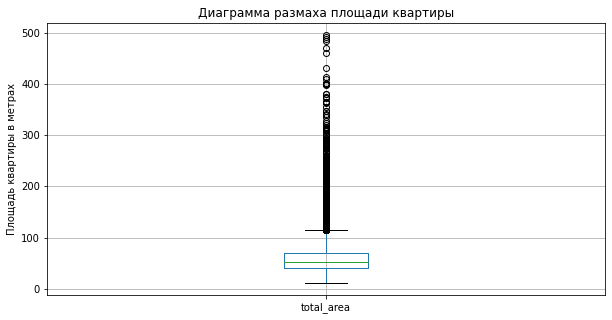

In [110]:
data.boxplot(column=['total_area'], figsize=(10,5), grid=True)
plt.ylabel('Площадь квартиры в метрах')
plt.title('Диаграмма размаха площади квартиры')
plt.show()

In [111]:
data['total_area'].describe()

count    23544.000000
mean        59.924607
std         33.192636
min         12.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        495.000000
Name: total_area, dtype: float64

In [112]:
t_data = data.query('total_area < 100') # чрезмерно выбивающиеся значения согласно распределению данных ящика с усами, площадь свыше 100 кв.метров

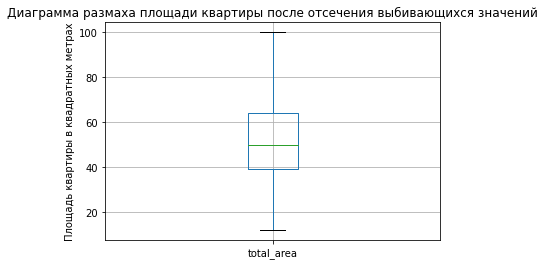

In [113]:
plt.title('Диаграмма размаха площади квартиры после отсечения выбивающихся значений')
t_data.boxplot(column=['total_area'], figsize=(9,5), grid=True)
plt.ylabel('Площадь квартиры в квадратных метрах')
plt.show()

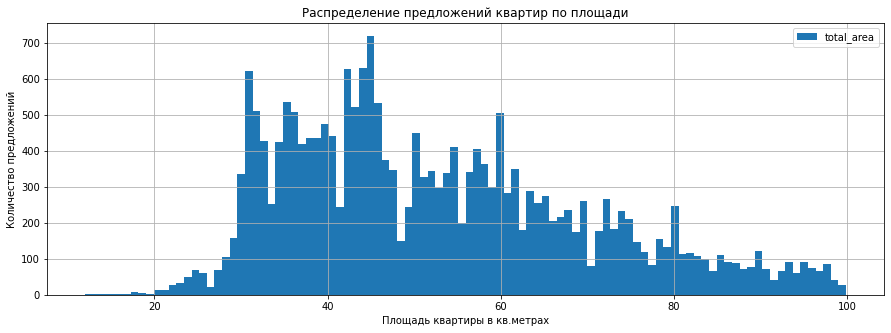

In [114]:
t_data.sort_values(by='total_area', ascending=True).plot(kind='hist', y='total_area',title='Распределение предложений квартир по площади',bins=100, figsize=(15,5), grid=True)
plt.xlabel('Площадь квартиры в кв.метрах')
plt.ylabel('Количество предложений')
plt.show()

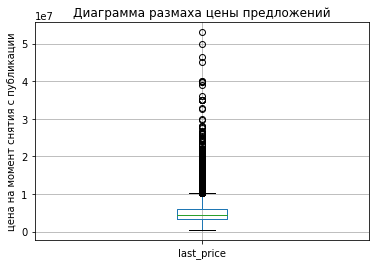

In [115]:
plt.title('Диаграмма размаха цены предложений')
t_data.boxplot('last_price')
plt.ylabel('цена на момент снятия с публикации')
plt.show()

In [116]:
t_data = t_data.query('last_price < 9000000') #Исключим аномально высокие цены, чтобы они не мешали при создании графика и не усложняли анализ и интерпретацию данных из гистограммы. Очевидно, что квартиры, стоимость которых превышает 9 млн., встречаются редко в наших данных, поэтому мы удалим их.

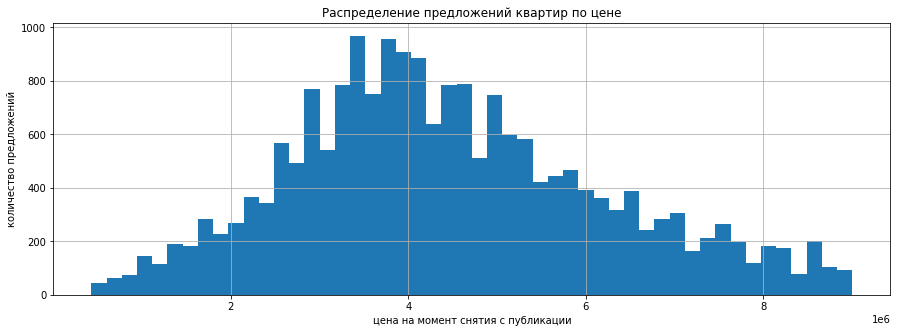

In [117]:
t_data.hist('last_price', grid=True, bins=50, figsize=(15,5))
plt.title('Распределение предложений квартир по цене')
plt.ylabel('количество предложений')
plt.xlabel('цена на момент снятия с публикации')
plt.show()

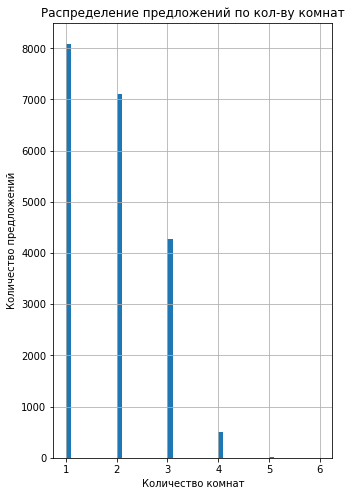

In [118]:
t_data.hist('rooms', grid=True, bins=50, figsize=(5,8))
plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений')
plt.title('Распределение предложений по кол-ву комнат')
plt.show()


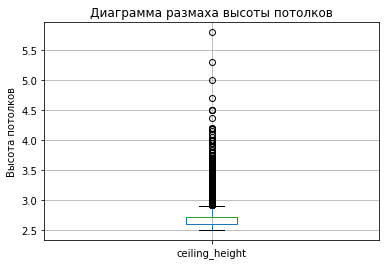

In [119]:
plt.title('Диаграмма размаха высоты потолков')
t_data.boxplot(column=['ceiling_height'], figsize=(9,5), grid=True)
plt.ylabel('Высота потолков')
plt.show()

In [120]:
t_data = t_data.query('ceiling_height < 3.0 and ceiling_height > 2.4') #Основываясь на графике, отсечём квартиры с потолками свыше 3 метра, а так же ниже 2,4

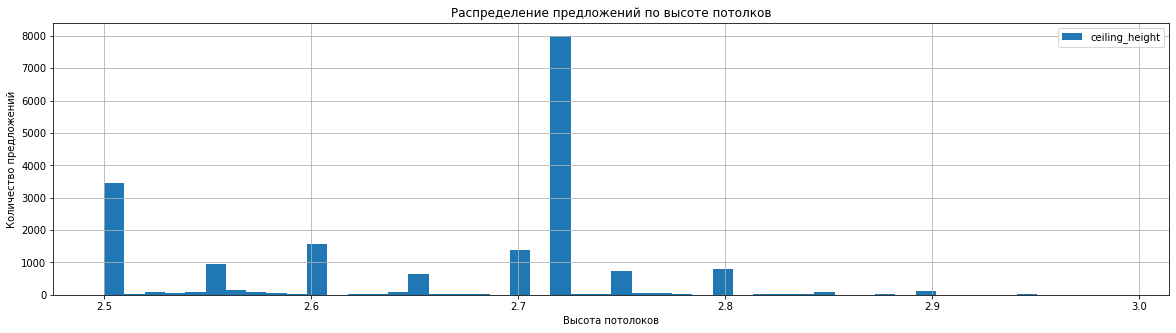

In [121]:
#plt.title("Распределение предложений по высоте потолков")
t_data.plot(kind='hist',y='ceiling_height',title='Распределение предложений по высоте потолков', grid=True, bins=50, figsize=(20,5),)
plt.xlabel('Высота потолоков')
plt.ylabel('Количество предложений')
plt.show()

In [122]:
t_data['living_area'].describe() # жилая площадь, добавлено 

count    18753.000000
mean        28.340012
std         11.177221
min          4.750000
25%         18.000000
50%         28.000000
75%         36.000000
max         80.000000
Name: living_area, dtype: float64

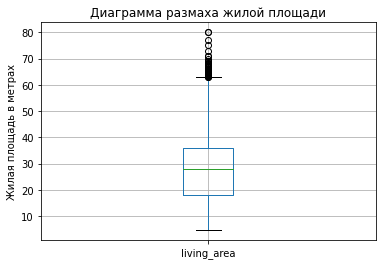

In [123]:
plt.title('Диаграмма размаха жилой площади')
t_data.boxplot(column=['living_area'], figsize=(10,5), grid=True)
plt.ylabel('Жилая площадь в метрах')
plt.show()

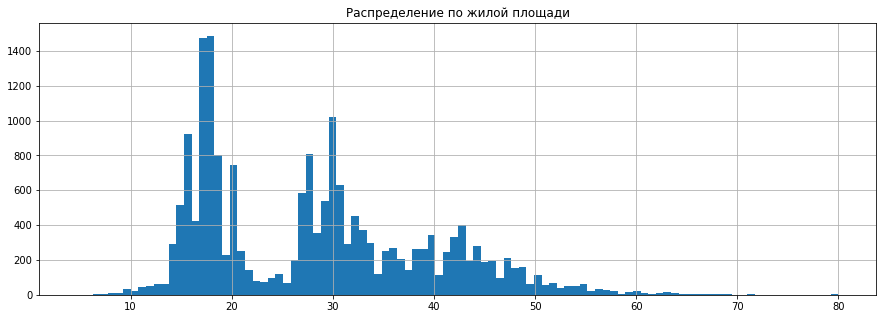

In [124]:
t_data.hist('living_area', bins=100, figsize=(15,5)) 
plt.title('Распределение по жилой площади')
plt.show()

In [125]:
len(data[data['living_area'] < 8])

11

In [126]:
data[data['living_area'] >= 8]

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images,price_metr,day_week_exposition,month_exposition,year_exposition,all_floor,center_nearest_km
0,18863.0,0,2.70,16028.0,0.0,2019-03-07,8,16.0,False,25.000000,13000000,51.0,санкт-петербург,False,1.000000,482.0,2.000000,755.0,3,False,108.00,20,120370,Четверг,3,2019,Другой,16.0
1,12817.0,2,2.72,18603.0,81.0,2018-12-04,1,11.0,False,11.000000,3350000,18.6,поселок шушары,False,0.000000,NaN,0.000000,NaN,1,False,40.40,7,82920,Вторник,12,2018,Первый,19.0
2,21741.0,0,2.72,13933.0,558.0,2015-08-20,4,5.0,False,8.300000,5196000,34.3,санкт-петербург,False,1.000000,90.0,2.000000,574.0,2,False,56.00,10,92785,Четверг,8,2015,Другой,14.0
3,28098.0,0,2.72,6800.0,424.0,2015-07-24,9,14.0,False,7.970933,64900000,74.5,санкт-петербург,False,2.000000,84.0,3.000000,234.0,3,False,159.00,0,408176,Пятница,7,2015,Другой,7.0
4,31856.0,0,3.03,8098.0,121.0,2018-06-19,13,14.0,False,41.000000,10000000,32.0,санкт-петербург,False,2.000000,112.0,1.000000,48.0,2,False,100.00,2,100000,Вторник,6,2018,Другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,45602.0,0,2.60,34104.0,239.0,2016-08-05,8,9.0,False,8.000000,4600000,40.0,петергоф,False,1.000000,352.0,1.000000,675.0,3,False,62.40,9,73717,Пятница,8,2016,Другой,34.0
23694,24665.0,0,3.70,4232.0,0.0,2017-03-21,3,5.0,False,13.830000,9700000,73.3,санкт-петербург,False,1.000000,796.0,3.000000,381.0,3,False,133.81,9,72490,Вторник,3,2017,Другой,4.0
23695,NaN,0,2.72,NaN,45.0,2018-01-15,4,5.0,False,8.500000,3100000,38.0,тосно,False,0.610844,NaN,0.767746,NaN,3,False,59.00,14,52542,Понедельник,1,2018,Другой,NaN
23696,NaN,0,2.72,NaN,0.0,2018-02-11,1,3.0,False,7.970933,2500000,29.7,село рождествено,False,0.610844,NaN,0.767746,NaN,2,False,56.70,18,44091,Воскресенье,2,2018,Первый,NaN


In [127]:
data = data.loc[(data["living_area"] >= 8)] # по снипу меньше 8 жилплощадь быть не может
data['living_area'].describe()

count    23533.000000
mean        34.294500
std         21.165902
min          8.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        347.500000
Name: living_area, dtype: float64

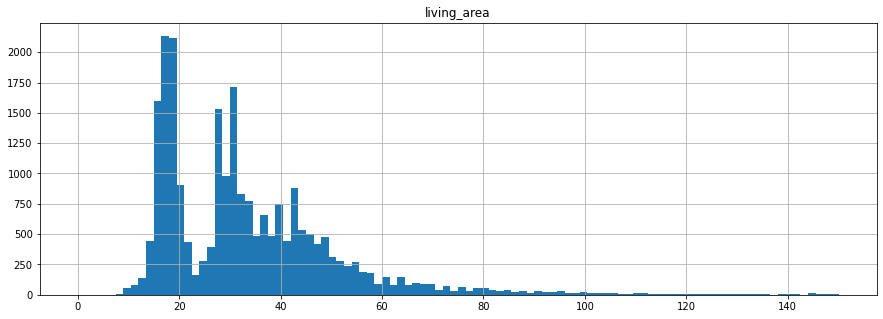

In [128]:
data.hist('living_area', bins=100, range =(0, 150), figsize=(15,5)) 
plt.title=('Распределение по жилой площади')
plt.show()

In [129]:
data['kitchen_area'].describe()  # площадь кухни, добавлено 

count    23533.000000
mean        10.310361
std          5.540244
min          5.000000
25%          7.400000
50%          9.000000
75%         11.400000
max        107.000000
Name: kitchen_area, dtype: float64

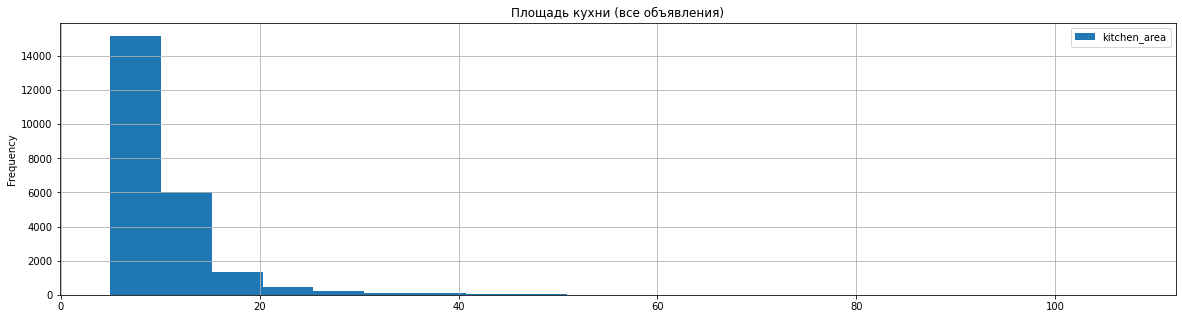

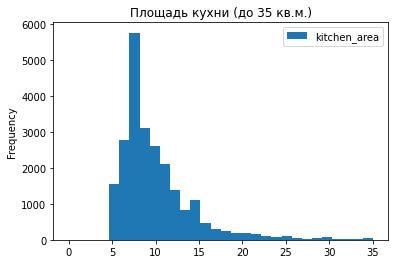

In [130]:
data.plot(kind='hist',y='kitchen_area', bins=20,grid=True, title='Площадь кухни (все объявления)', figsize=(20,5),)
plt.xlabel=('площадь в кв.м.') 
plt.ylabel=('количество объектов')
plt.show()

#гистограмма выборки (площадь кухни до 35 кв.м.)
data.plot(kind='hist',y='kitchen_area', bins=30,  range=(0, 35), title='Площадь кухни (до 35 кв.м.)')
plt.xlabel=('площадь в кв.м.')
plt.ylabel=('количество объектов')

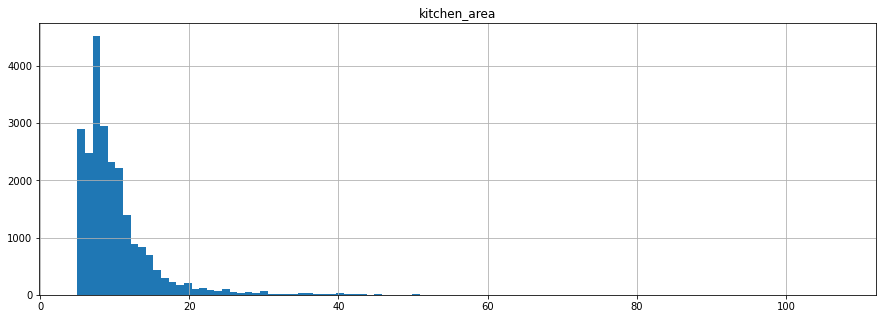

In [131]:
data.hist('kitchen_area', bins=100, figsize=(15,5)) 
plt.title=('Распределение по кухонной площади')
plt.show()

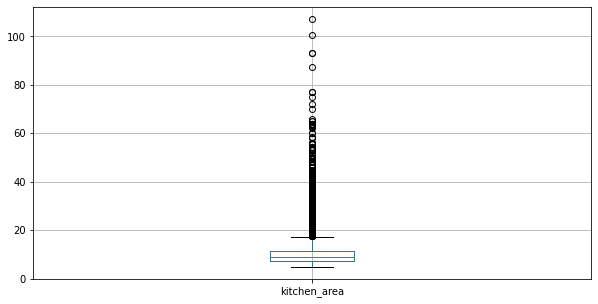

In [132]:
plt.title=('Диаграмма размаха кухонной площади')
data.boxplot(column=['kitchen_area'], figsize=(10,5), grid=True)
plt.ylabel=('Кухонная площадь')
plt.show()

In [133]:
data['floor'].describe()  # этаж квартиры, добавлено 

count    23533.000000
mean         5.879743
std          4.875248
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

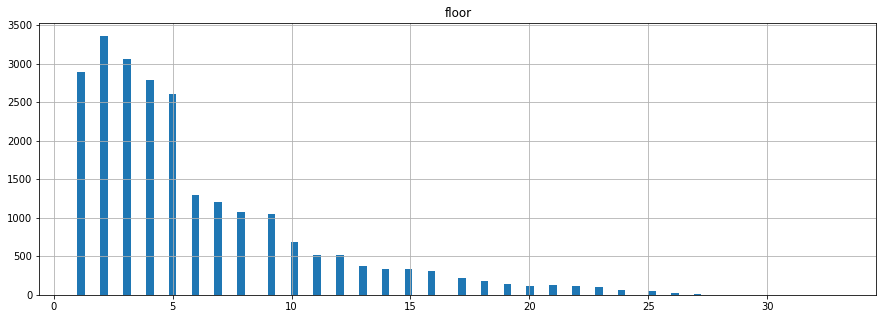

In [134]:
data.hist('floor', bins=100, figsize=(15, 5))
plt.title=('Распределение этажности')
plt.show()

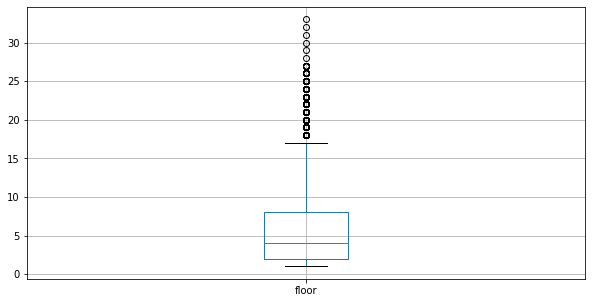

In [135]:
plt.title=('Диаграмма этажности')
data.boxplot(column=['floor'], figsize=(10,5), grid=True)
plt.ylabel=('Этаж')
plt.show()

Больше всего квартир на продаже с 1 по 5 этажи

<AxesSubplot:ylabel='last_price'>

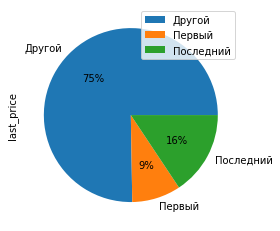

In [136]:
data.groupby(['all_floor']).sum().plot(kind='pie',y='last_price', autopct='%1.0f%%')  # тип этажа, добавлено 

Из диаграммы можно сделать вывод, что 76% квартир выставленных на продажу располагаются не на первых и последних этажах. Квартиры на последних этажах в цене выше чем на первых, часто это объясняется комфортом и видом т.к. на первых этажах обычно шумно, часто располагаются коммерческие помещения, что влияет на стоимость объекта.

In [137]:
data['floors_total'].describe() # общее кол-во этажей в доме

count    23533.000000
mean        10.646411
std          6.584383
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

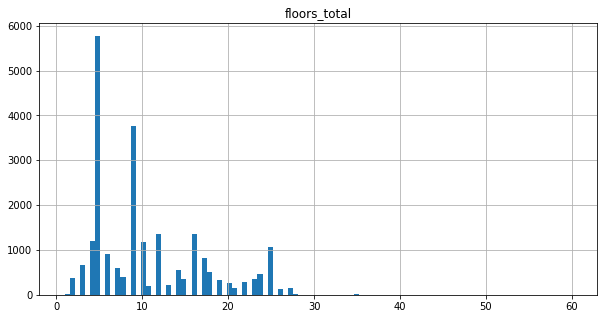

In [138]:
data.hist('floors_total', bins=100, figsize=(10, 5))
plt.title=('Распределение многоэтажности ')
plt.xlabel=('Количество этажей')
plt.ylabel=('Количество предложений')
plt.show()

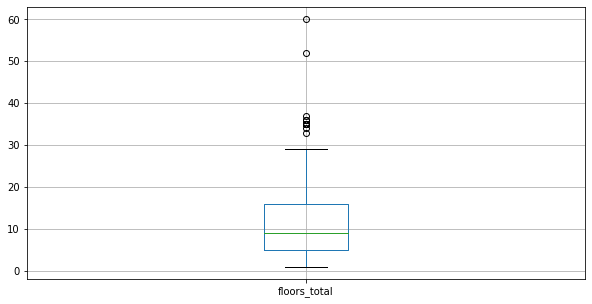

In [139]:
plt.title=('Диаграмма многоэтажности ')
data.boxplot(column=['floors_total'], figsize=(10,5), grid=True)
plt.ylabel=('этаж')
plt.show()

In [140]:
data = data[data.floors_total < 30]
data['floors_total'].describe()

count    23501.000000
mean        10.611378
std          6.517184
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

Минимальный этаж в пределах нормы - 1, а вот  максимум пришлось корректировать т.к. самые высокие жилые дома Спб по количеству этажей - 36 этажей. Также по диаграмме размаха у нас есть явный выброс в высотности выше 30, исправим это.В выборке остались квартиры этажностью с 1 по 30.По графику видно, что больше всего квартир продается на 5 и 9 этажах. 

In [141]:
data['center_nearest_km'].describe()  # расстояние до центра, добавлено  

count    18030.000000
mean        14.190183
std          8.624911
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: center_nearest_km, dtype: float64

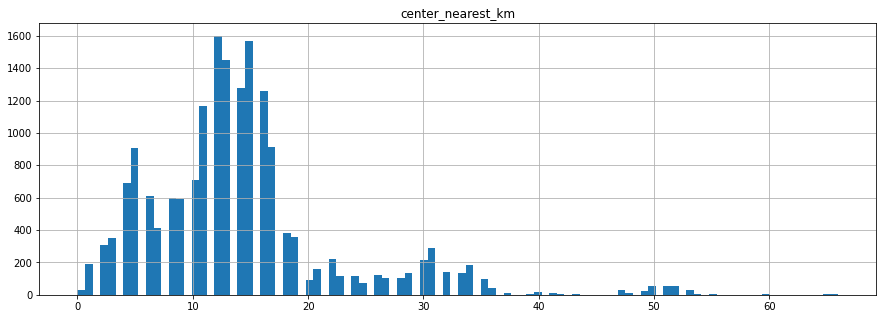

In [142]:
data.hist('center_nearest_km', bins=100, figsize=(15, 5))
plt.title=('Распределение расстояние до центра города')
plt.show()

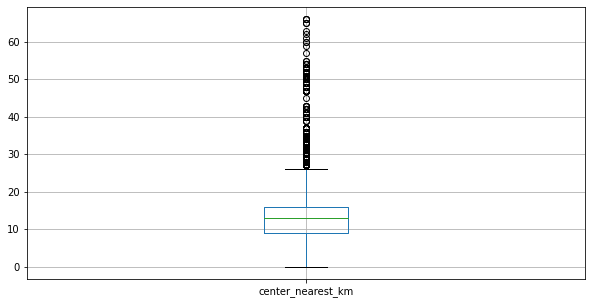

In [143]:
data.boxplot(column=['center_nearest_km'], figsize=(10,5), grid=True)
plt.ylabel=('удаленность от центра')
plt.title=('Диаграмма размаха расстояния до центра города')
plt.show()

Минимальная удаленность - 0, максимальная 66 км. Больше всего квартир продается в 12 и 15 км от центра СПб, т.к. это густо населенные спальные районы города. Меньше всего продается квартир за городом в 40 и более км от центра.

In [144]:
data['airports_nearest'].describe()

count    18007.000000
mean     28798.881546
std      12638.037333
min       6450.000000
25%      18551.500000
50%      26750.000000
75%      37274.000000
max      84869.000000
Name: airports_nearest, dtype: float64

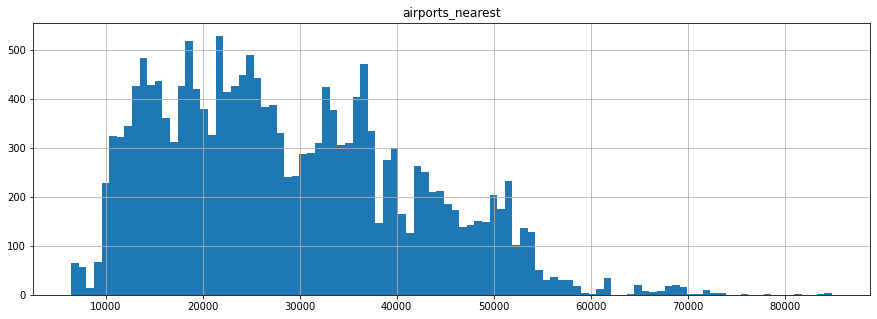

In [145]:
data.hist('airports_nearest', bins=100, figsize=(15, 5))
plt.title=('Распределение расстояния до ближайшего аэропорта')
plt.show()

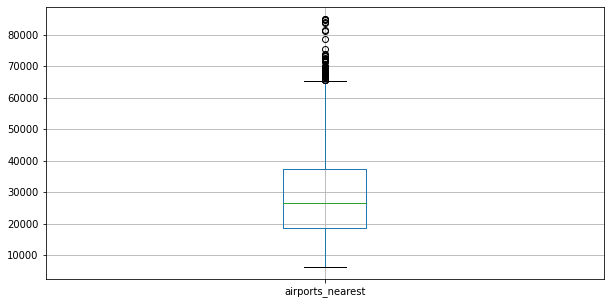

In [146]:
plt.title=('Диаграмма размаха расстояния до ближайшего аэропорта')
data.boxplot(column=['airports_nearest'], figsize=(10,5), grid=True)
plt.ylabel=('расстояние до ближайшего аэропорта')
plt.show()

График подтверждает предыдущий вывод о том, что много квартир продается в спальных районах.

In [147]:
data['parks_nearest'].describe()

count    8018.000000
mean      490.137191
std       340.549255
min         1.000000
25%       287.250000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

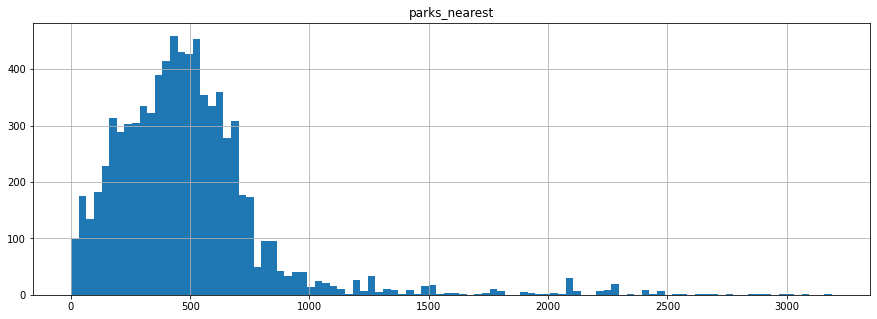

In [148]:
data.hist('parks_nearest', bins=100, figsize=(15, 5))
plt.title=('Распределение расстояния до ближайшего парка')
plt.xlabel=('Расстояние в метрах')
plt.ylabel=('Количество предложений')
plt.show()

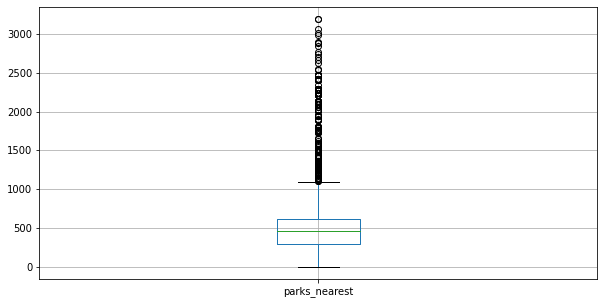

In [149]:
plt.title=('Диаграмма размаха расстояния до ближайшего парка')
data.boxplot(column=['parks_nearest'], figsize=(10,5), grid=True)
plt.ylabel=('расстояние до ближайшего парка')
plt.show()

Среднее расстояние до ближайшего парка 490 метров, самое ближайшее - 1 метр.Максимальное расстояние 3190 м, что не очень далеко. Большая часть квартир продается в удаленности от парка в пределах 300-600 м.

In [150]:
data['day_week_exposition'].value_counts()

Четверг        4264
Вторник        4145
Пятница        3969
Среда          3929
Понедельник    3592
Суббота        1919
Воскресенье    1683
Name: day_week_exposition, dtype: int64

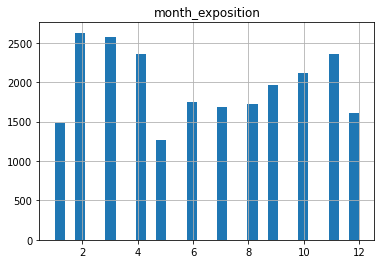

In [151]:
data.hist(column='month_exposition', bins=30)
plt.title=('Распределение публикаций объявлений по месяцам')
plt.show()

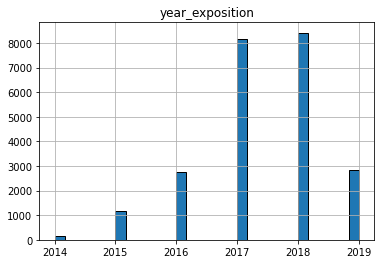

In [152]:
data.hist(column='year_exposition', bins=30, ec='black')
plt.title=('Распределение публикаций объявлений по годам')
plt.show()

В 2017 и 2018 году было опубликовано больше всего объявлений о продаже квартир. 
Февраль, март, апрель самые насыщенные месяца по кол-ву объявлений.
А вторник и четверг самые популярные дни. 

Исходя из анализа площади, цены, количества комнат и высоты потолков, можно утверждать, что основную долю предложений по продаже квартир составляют 1-2 комнатные квартиры в ценовой категории от 4 млн.руб с высотой потолков от 2,75 метров.

Изучим время продажи квартиры

In [153]:
t_data.head(10)

,airports_nearest,balcony,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,rooms,studio,total_area,total_images,price_metr,day_week_exposition,month_exposition,year_exposition,all_floor,center_nearest_km
1,12817.0,2,2.72,18603.0,81.0,2018-12-04,1,11.0,False,11.00,3350000,18.60,поселок шушары,False,0.000000,NaN,0.000000,NaN,1,False,40.40,7,82920,Вторник,12,2018,Первый,19.0
2,21741.0,0,2.72,13933.0,558.0,2015-08-20,4,5.0,False,8.30,5196000,34.30,санкт-петербург,False,1.000000,90.0,2.000000,574.0,2,False,56.00,10,92785,Четверг,8,2015,Другой,14.0
5,NaN,0,2.72,NaN,55.0,2018-09-10,5,12.0,False,9.10,2890000,14.40,поселок городского типа янино-1,False,0.610844,NaN,0.767746,NaN,1,False,30.40,10,95065,Понедельник,9,2018,Другой,NaN
6,52996.0,1,2.72,19143.0,155.0,2017-11-02,6,26.0,False,14.40,3700000,10.60,поселок парголово,False,0.000000,NaN,0.000000,NaN,1,False,37.30,6,99195,Четверг,11,2017,Другой,19.0
7,23982.0,2,2.72,11634.0,0.0,2019-04-18,22,24.0,False,18.90,7915000,43.40,санкт-петербург,False,0.000000,NaN,0.000000,NaN,2,False,71.60,5,110544,Четверг,4,2019,Другой,12.0
8,NaN,0,2.72,NaN,189.0,2018-05-23,26,27.0,False,8.81,2900000,15.43,поселок мурино,False,0.610844,NaN,0.767746,NaN,1,False,33.16,20,87454,Среда,5,2018,Другой,NaN
9,50898.0,2,2.50,15008.0,289.0,2017-02-26,7,9.0,False,6.50,5400000,43.60,санкт-петербург,False,0.000000,NaN,0.000000,NaN,3,False,61.00,18,88524,Воскресенье,2,2017,Другой,15.0
10,38357.0,0,2.67,13878.0,137.0,2017-11-16,3,12.0,False,8.50,5050000,20.30,санкт-петербург,False,1.000000,310.0,2.000000,553.0,1,False,39.60,5,127525,Четверг,11,2017,Другой,14.0
11,48252.0,1,2.72,51677.0,7.0,2018-08-27,4,5.0,False,6.00,3300000,31.00,ломоносов,False,0.000000,NaN,0.000000,NaN,2,False,44.00,9,75000,Понедельник,8,2018,Другой,52.0
12,NaN,0,2.72,NaN,90.0,2016-06-30,5,5.0,False,9.00,3890000,30.00,сертолово,False,0.610844,NaN,0.767746,NaN,2,False,54.00,10,72037,Четверг,6,2016,Последний,NaN


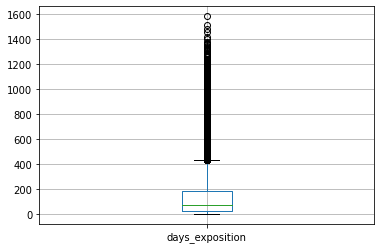

In [154]:
plt.title=('Диаграмма размаха времени продажи квартиры')
t_data.boxplot('days_exposition')
plt.ylabel=('Время продажи квартиры')
plt.show()

In [155]:
t_data['days_exposition'].agg(['mean','median'])

mean      147.355676
median     69.000000
Name: days_exposition, dtype: float64

In [156]:
t_data = t_data.query('days_exposition < 400') # отсечем значения больше 400

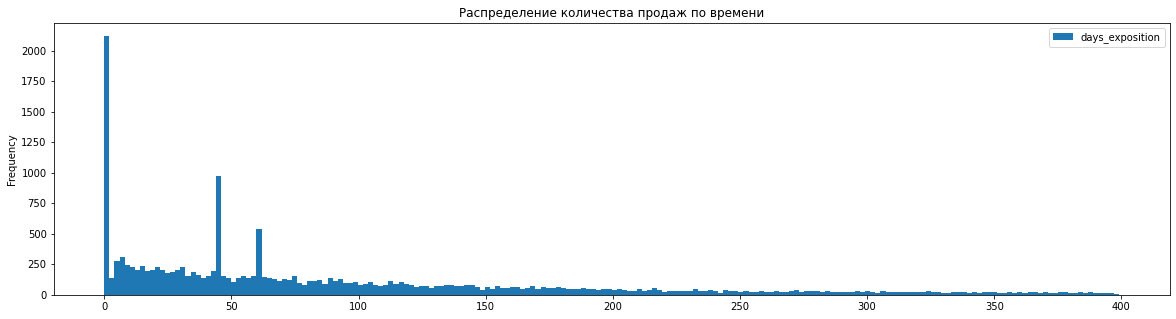

In [157]:
t_data.plot(kind='hist',y='days_exposition',title='Распределение количества продаж по времени', bins=200, figsize=(20,5))
#plt.title('Распределение количества продаж по времени')
plt.xlabel=('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel=('Количество объявлений')
plt.show()

Мы видим большой выброс в районе нуля. Это произошло из-за того, что мы заменили пропуски. Также в это значение можно заложить, что объявления еще в продпже или технический сбой.
Также видим пики в районе 40 и 60 дней.  Можем сделать вывод что большинство  сделок проходит в районе 2-3 месяцев
В принципе мы рассмотрели соотношение запрашиваемых графиков.

**Дополнение** не являсь экспертом, я могу предположить,из моей практики, что быстрые продажи - это когда они происходят до 40 дней. Это оптимальное кол-во дней, чтобы собрать все необходимые документы и принять необходимые решения.
Необычно медленные продажи - это те, которые выхоядт за рамки 300 дней, т.е. недвижимость продается около или более года. Это означачает, что она либо неверно оценена, возможно в не популярных местах, возможно непопулярные параметры у квартиры.

Зависимость цены от площади, числа комнат, удаленности от центра

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='city_centers_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='city_centers_nearest'>,
        <AxesSubp

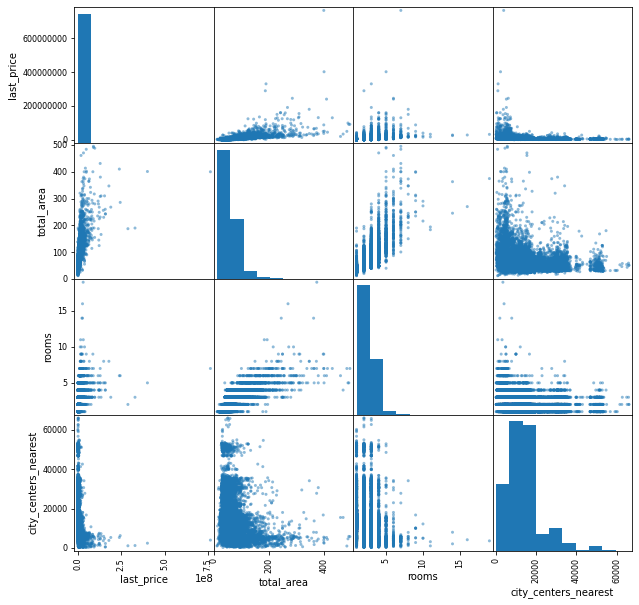

In [158]:
pd.plotting.scatter_matrix(data[['last_price', 'total_area', 'rooms', 'city_centers_nearest']], figsize=(10, 10)) #строим матрицу рассеивания

In [159]:
data[['last_price', 'total_area', 'rooms', 'city_centers_nearest']].corr() #Дополним матрицу рассеивания таблицей коэффициентов корреляции

,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.622125,0.356741,-0.215026
total_area,0.622125,1.000000,0.777776,-0.238574
rooms,0.356741,0.777776,1.000000,-0.185869
city_centers_nearest,-0.215026,-0.238574,-0.185869,1.000000


In [160]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23501.000000,2.350100e+04,23501.000000,23501.000000
mean,59.938171,6.436521e+06,2.076720,2.724661
std,33.208014,1.003540e+07,1.056664,0.214770
min,12.000000,1.219000e+04,1.000000,2.500000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.632000e+06,2.000000,2.720000
75%,69.600000,6.750000e+06,3.000000,2.720000
max,495.000000,7.630000e+08,19.000000,5.800000


<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, xlabel='rooms'>

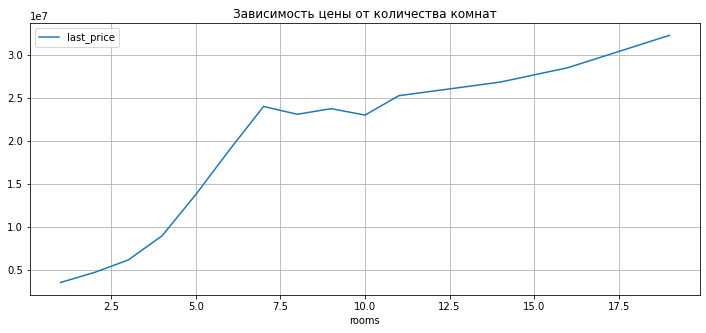

In [161]:
# создаем сводную таблицу с медианными значениями цены, группируя по количеству комнаты. Строим по ней график.
data.pivot_table(
    index='rooms', 
    values='last_price', 
    aggfunc='median') \
  .plot(grid=True, figsize=(12, 5), title='Зависимость цены от количества комнат')

<AxesSubplot:title={'center':'Зависимость цены от удаленности от центра'}, xlabel='city_centers_nearest', ylabel='last_price'>

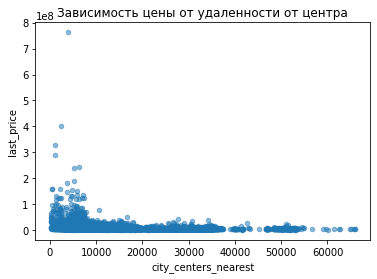

In [162]:
data.plot(x='city_centers_nearest', y='last_price', kind='scatter', title='Зависимость цены от удаленности от центра', alpha=0.5)

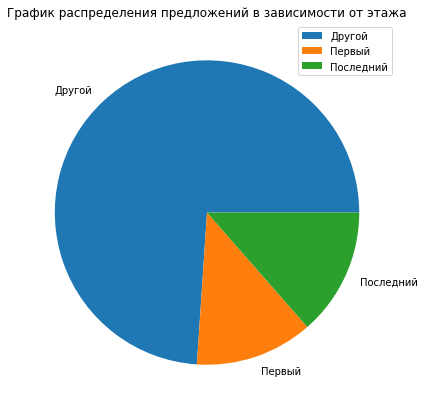

In [164]:
t_data.pivot_table(index='all_floor',values='last_price',aggfunc='count').plot.pie(y='last_price', figsize=(7,7), label='', title='График распределения предложений в зависимости от этажа')
plt.show()

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

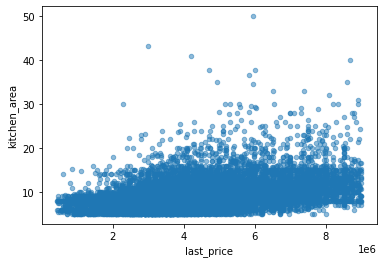

In [165]:
t_data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.5)

Явной закономерности в наличии кухни от цены отследить не удалось.  Видим что есть кухни от 10 до 20 м в диапазоне от 3 до 7 миллионов.

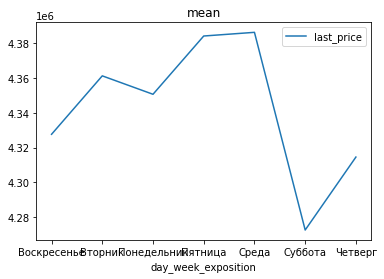

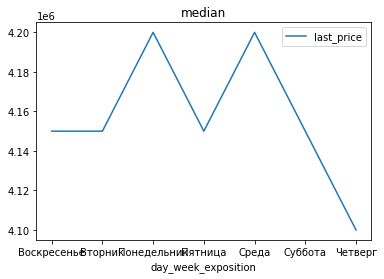

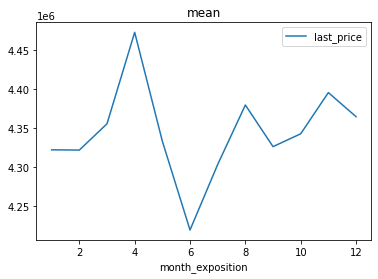

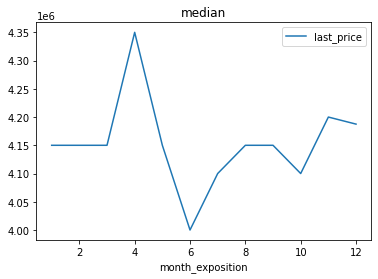

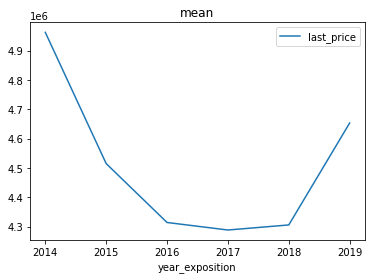

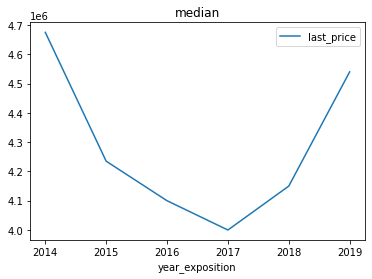

In [167]:
t_data.pivot_table(index='day_week_exposition',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
t_data.pivot_table(index='day_week_exposition',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

t_data.pivot_table(index='month_exposition',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
t_data.pivot_table(index='month_exposition',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

t_data.pivot_table(index='year_exposition',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
t_data.pivot_table(index='year_exposition',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

Из графиков видно, что любой этаж, кроме первого и последнего, имеет высокую цену и большое количество предложений на рынке. 
Однако график цены не так значительно меняется в зависимости от количества комнат.
Чем больше площадь объекта недвижимости, тем выше цена.
Дешевле всего стоит недвижимость, размещенная в пятницу и воскресенье, по месяцам: дешевле всего недвижимость, размещенная в июне
По годам - самая дорогая недвижимость была с 2014 по 2016 год и с 2018 по 2019    

In [168]:
top_10 = data.pivot_table(index='locality_name', values=['first_day_exposition'], aggfunc='count').sort_values(by='first_day_exposition', ascending=False).head(10)
top_10.columns=['number_all']
top_10 # смотрим 10 населённых пунктов с наибольшим числом объявлений

,number_all
locality_name,
санкт-петербург,15576
поселок мурино,537
поселок шушары,440
всеволожск,398
пушкин,367
колпино,338
поселок парголово,326
гатчина,307
деревня кудрово,298


<AxesSubplot:ylabel='count'>

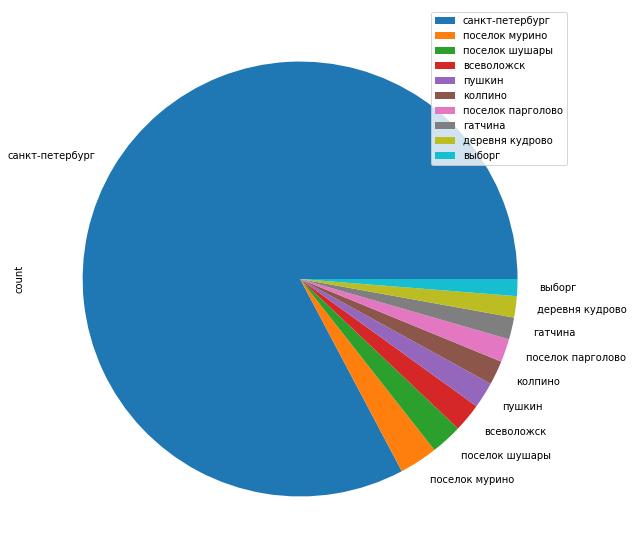

In [169]:
loc_metr_price = data.loc[:, ['locality_name', 'price_metr']]
loc_metr_price = loc_metr_price.pivot_table(index='locality_name', values='price_metr', aggfunc=['count', 'mean'])
loc_metr_price.columns = ['count', 'mean_metr_price']
top_10_loc = loc_metr_price.sort_values(by='count', ascending=False).head(10)
top_10_loc.plot(y='count', kind='pie', figsize=(10, 10))

In [ ]:
top_10_loc

Как мы видим основной лидер без неожиданностей Санкт-Петербург. Далее идут ближайшие идут районы, которые весьма удалены от метро.
Самая дорогая недвижимость в Спб, самая дешевая в Выборге.

In [170]:
local_spb = data.loc[data['locality_name'] == 'санкт-петербург']
local_spb = local_spb.dropna(subset=['city_centers_nearest'])

In [171]:
local_spb['city_centers_nearest_km'] = (local_spb['city_centers_nearest']/1000).round().astype(int)

In [172]:
local_spb['city_centers_nearest_km'].describe()

count    15517.000000
mean        11.586582
std          4.851115
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: city_centers_nearest_km, dtype: float64

<AxesSubplot:title={'center':'Зависимость цены от удаленности от центра'}, xlabel='city_centers_nearest_km'>

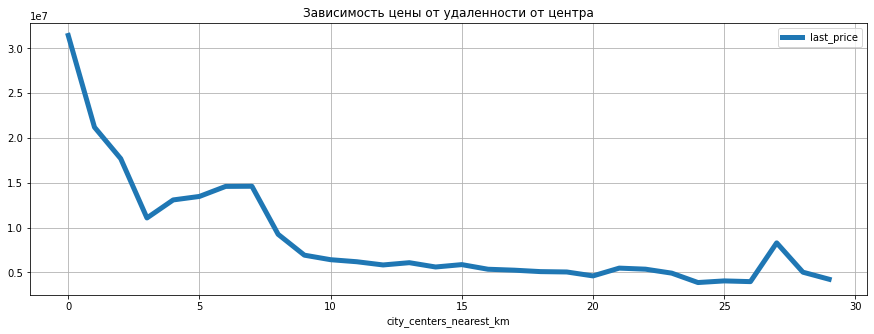

In [173]:
local_spb.pivot_table(
    index='city_centers_nearest_km',
    values='last_price',
    aggfunc='mean') \
  .plot(grid=True, figsize=(15, 5), linewidth=5, title='Зависимость цены от удаленности от центра')

Видим падение цены после 7 километра

### Общий вывод

Мы рассмотрели данные по файлу за выделенный учетный период.
В целом большинство данных удалось заменить либо убрать, однако были моменты в которых данных не хватало.
После проведения работы по обработке и анализу данных, связанных с пропущенными и некорректными значениями, становится очевидным, что необходимо обратить внимание на заполнение данных, а также на корректность выгрузки данных из программы. Ошибки, как опечатки, в целом отсутствовали, что значительно упростило процесс предобработки данных для последующего анализа.

В ТОП-5 входят ближайшие к Санкт-Петербургу города и сгорода области:Пушкин,Гатчина,Всеволожск,Выборг.
Цена конечно в основном зависит от площади квартиры, однако как мы увидели на примере с этажностью, что этаж может быть очень одним из факторов различия цены.
Также на цену значильно влияет размещение от центра.
Сроки продаж- это либо быстрые сделки до 30 дней, либо сделки от 2 до 3 месяцев в основном.
Большинство объектов имеют площадь от 30 до 62 кв. стоимостью от 2 до 6 млн. руб., в основном это одно-двух комнатные квартиры с высотой потолков — от 2.6 до 2.7 м.
